In [105]:
# Import Libraries
    
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  #Adjusts the configuration of the plots we will create


In [106]:
# Read in the dataset


data = pd.read_csv('movies.csv')

In [107]:
# Let's look at the data (top 5)

data.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [108]:
# Checking for missing data in dataset

for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [109]:
# Smmarize the characteristics of the data coluhmns to check for data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [110]:
#Data cleaning of our dataset
#Checking missing values/null
data.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [111]:
# To drop/delete the dataset with Null values
data = data.dropna()

In [112]:
# Confirming our drop null cmd worked
data.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [113]:
#Checking for duplicates
data.duplicated().sum()

0

In [114]:
# To get the number of colums and rows in the dataset after data cleaning
data.shape

(5421, 15)

In [115]:
#Checking the data types of each column
data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [154]:
data.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country      budget        gross  company  runtime  
0   699       46  19000000.0   46998772.0     1426    146.0  
1   214       47   4500000.0   58853106.0      452    104.0  
2  1157       47  18000000.0  538375067.0      945    124.0  
3  1474       47   3500000.0   83453539.0     1108     88.0  
4   271       47   6000000.0   39846344.0     1083     98.0

In [132]:
# sort data using "gross" in ascending order

data.sort_values(by=['gross'], inplace=False, ascending=False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
6311                                    Despicable Me 2         PG  Animation   
6

In [133]:
pd.set_option('display.max_rows', None)

In [155]:
data.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country      budget        gross  company  runtime  
0   699       46  19000000.0   46998772.0     1426    146.0  
1   214       47   4500000.0   58853106.0      452    104.0  
2  1157       47  18000000.0  538375067.0      945    124.0  
3  1474       47   3500000.0   83453539.0     1108     88.0  
4   271       47   6000000.0   39846344.0     1083     98.0

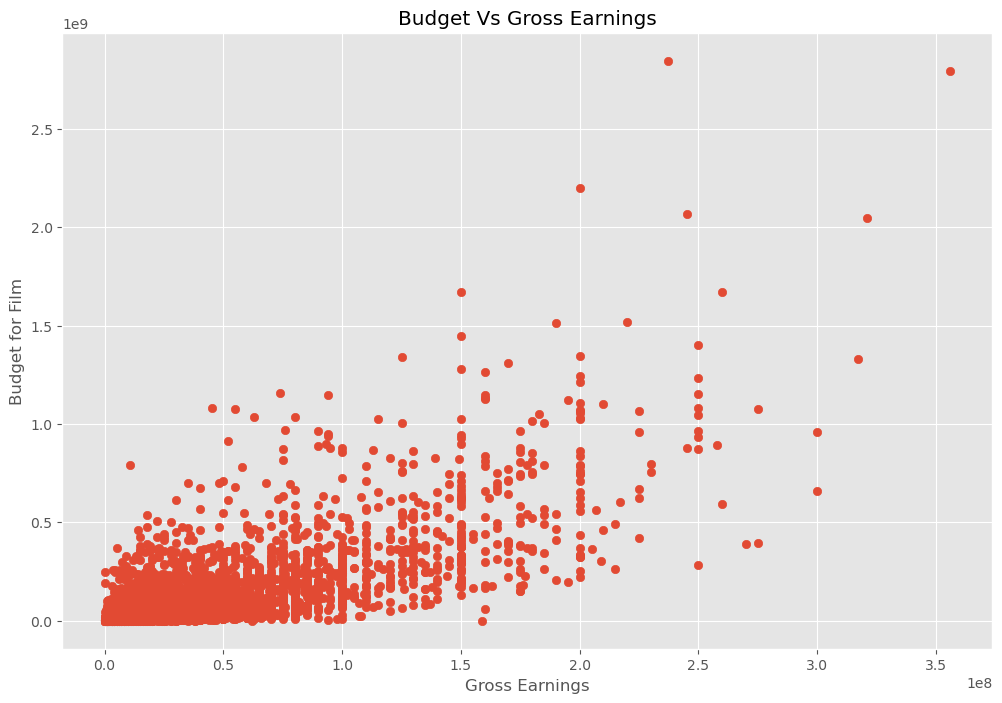

In [135]:
#scatter plot with budget vs gross

plt.scatter(x = data['budget'], y = data['gross'])

plt.title('Budget Vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()



<AxesSubplot:xlabel='budget', ylabel='gross'>

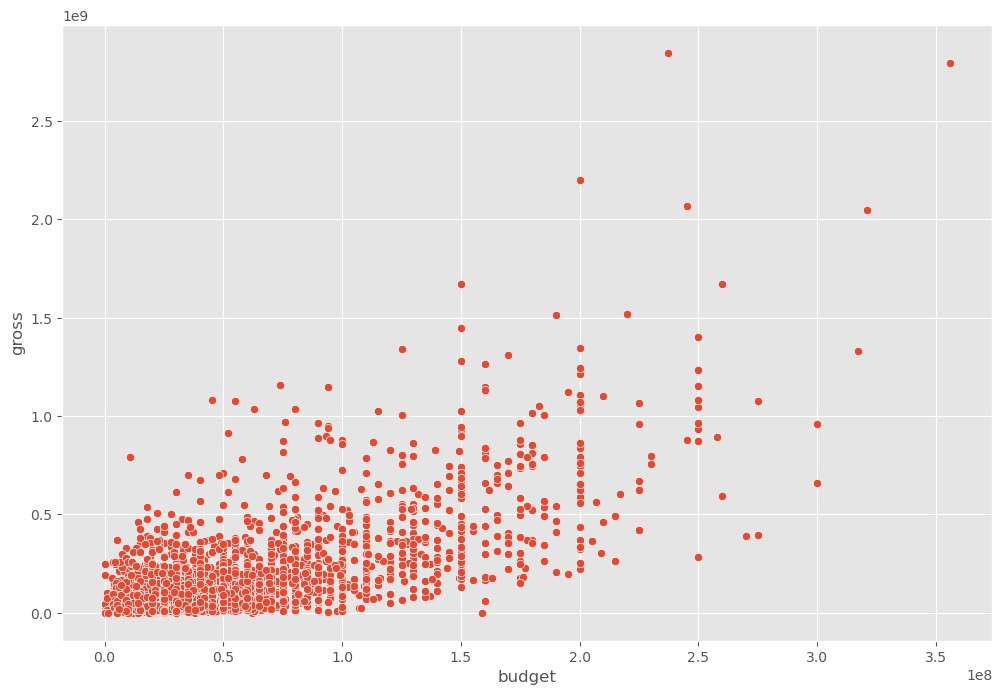

In [136]:
# scatter plot with budget vs gross using seaborn

sns.scatterplot(data=data, x="budget", y="gross")

<AxesSubplot:xlabel='budget', ylabel='gross'>

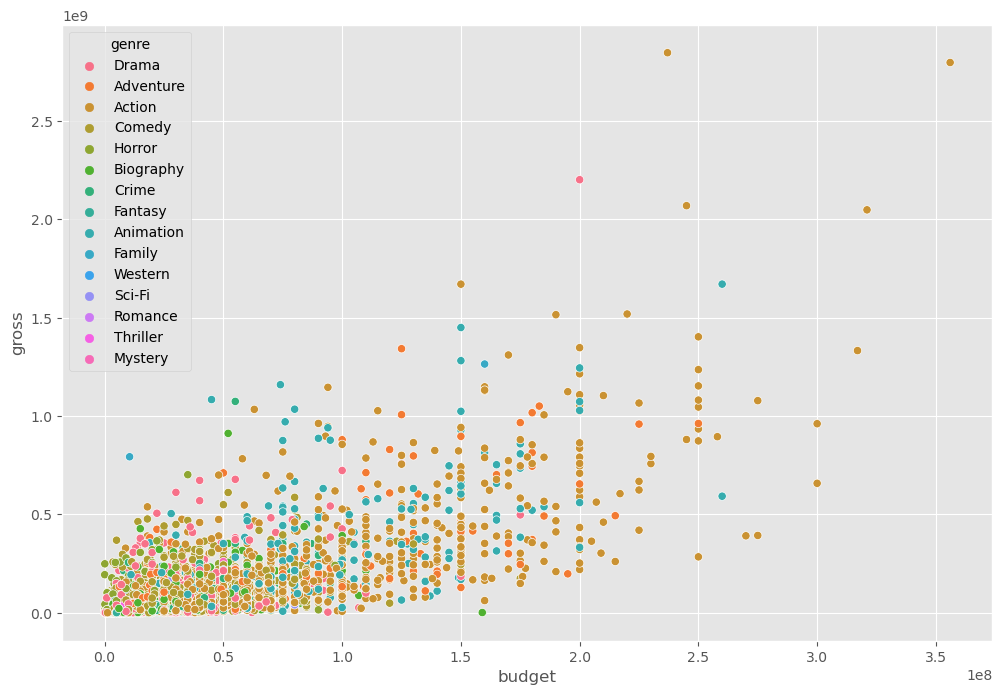

In [137]:
#hue -Grouping variable that will produce points with different colors.

sns.scatterplot(data=data, x="budget", y="gross", hue="genre")

<AxesSubplot:xlabel='budget', ylabel='gross'>

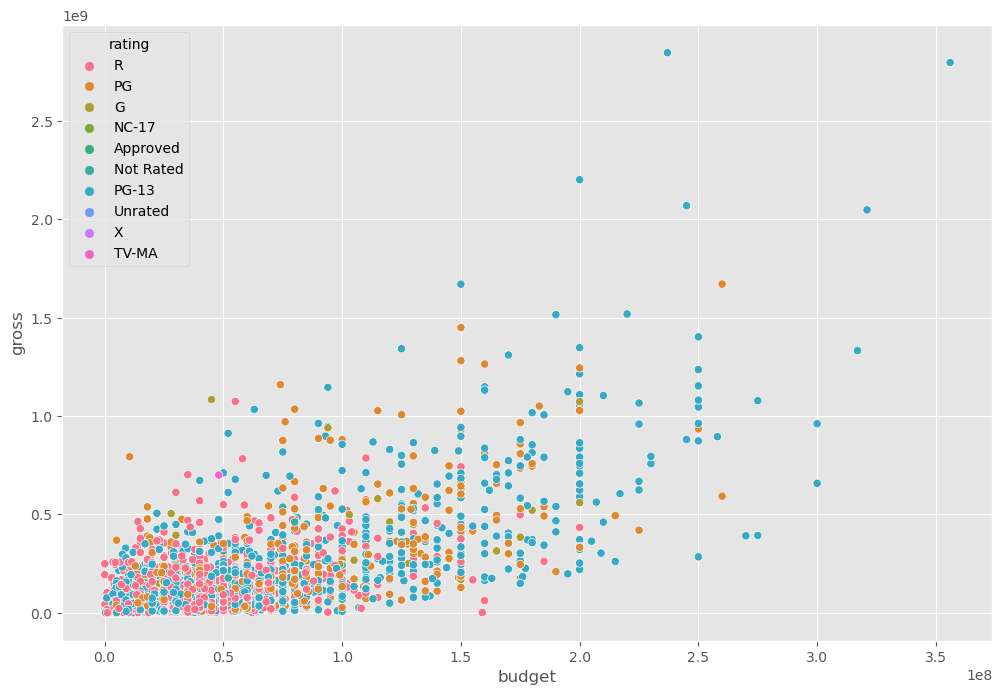

In [123]:
sns.scatterplot(data=data, x="budget", y="gross", hue="rating")

<AxesSubplot:xlabel='budget', ylabel='gross'>

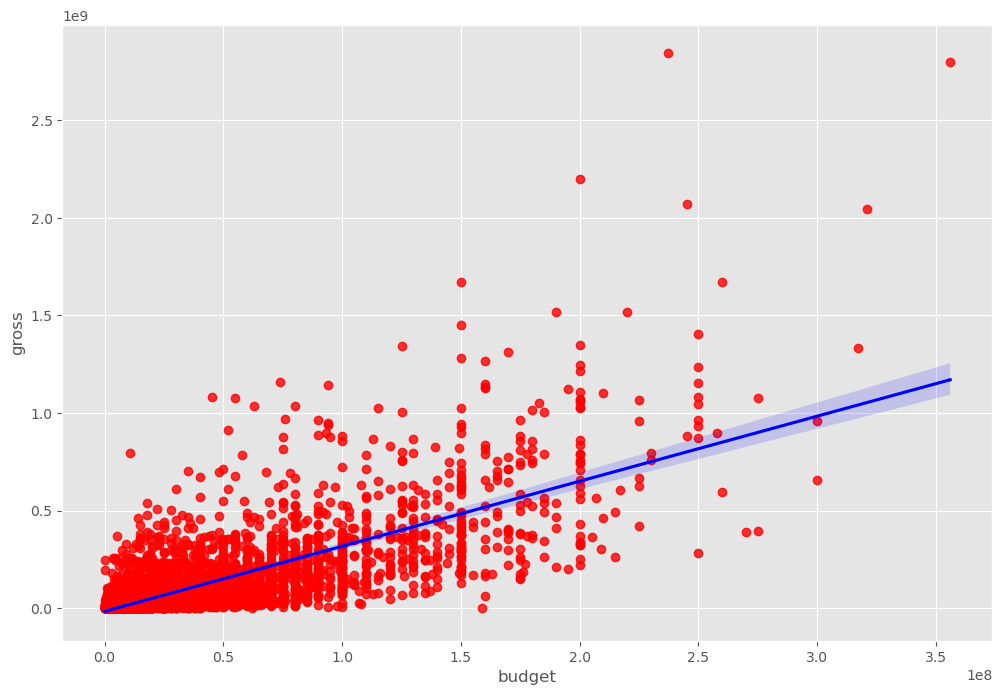

In [124]:

sns.regplot(data=data, x="budget", y="gross", scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [138]:
# Looking at correlation

#pearson, kendall, spearman

data.corr(method = 'pearson') 

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

In [126]:
# We can see above that buget & gross have perfect correlation rate

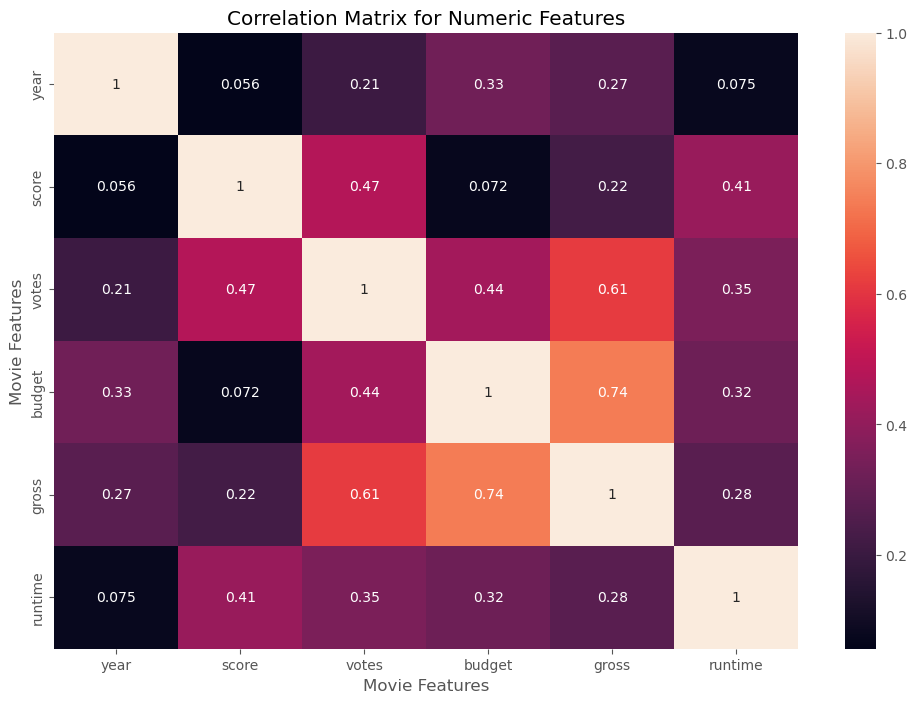

In [139]:
correlation_matrix = data.corr(method = 'pearson') 

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [156]:
data_numerized = data

for col_name in data_numerized.columns:
    if(data_numerized[col_name].dtype == 'object'):
        data_numerized[col_name] = data_numerized[col_name].astype('category')
        data_numerized[col_name] = data_numerized[col_name].cat.codes
        
data_numerized.head()


name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country      budget        gross  company  runtime  
0   699       46  19000000.0   46998772.0     1426    146.0  
1   214       47   4500000.0   58853106.0      452    104.0  
2  1157       47  18000000.0  538375067.0      945    124.0  
3  1474       47   3500000.0   83453539.0     1108     88.0  
4   271       47   6000000.0   39846344.0     1083     98.0

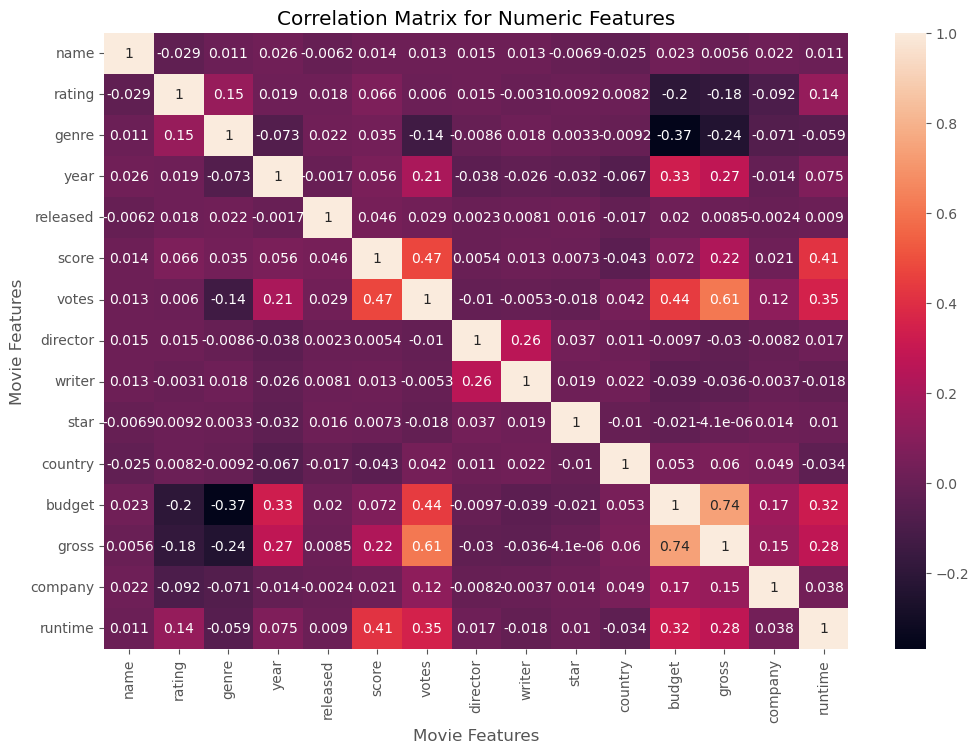

In [149]:
correlation_matrix = data_numerized.corr() 

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [150]:
data_numerized.corr() 

name    rating     genre      year  released     score  \
name      1.000000 -0.029234  0.010996  0.025542 -0.006152  0.014450   
rating   -0.029234  1.000000  0.147796  0.019499  0.018083  0.065983   
genre     0.010996  0.147796  1.000000 -0.073167  0.022142  0.035106   
year      0.025542  0.019499 -0.073167  1.000000 -0.001740  0.056386   
released -0.006152  0.018083  0.022142 -0.001740  1.000000  0.045874   
score     0.014450  0.065983  0.035106  0.056386  0.045874  1.000000   
votes     0.012615  0.006031 -0.135990  0.206021  0.028833  0.474256   
director  0.015246  0.014656 -0.008553 -0.038354  0.002308  0.005413   
writer    0.012880 -0.003149  0.017578 -0.025908  0.008072  0.012843   
star     -0.006882  0.009196  0.003341 -0.032157  0.015706  0.007296   
country  -0.025490  0.008230 -0.009164 -0.066748 -0.017228 -0.043051   
budget    0.023392 -0.203946 -0.368523  0.327722  0.019952  0.072001   
gross     0.005639 -0.181906 -0.244101  0.274321  0.008501  0.222556   
company   0.021697 -0.092357 -0.071334 -0.014333 -0.002407  0.020656   
runtime   0.010850  0.140792 -0.059237  0.075077  0.008975  0.414068   

             votes  director    writer      star   country    budget  \
name      0.012615  0.015246  0.012880 -0.006882 -0.025490  0.023392   
rating    0.006031  0.014656 -0.003149  0.009196  0.008230 -0.203946   
genre    -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.368523   
year      0.206021 -0.038354 -0.025908 -0.032157 -0.066748  0.327722   
released  0.028833  0.002308  0.008072  0.015706 -0.017228  0.019952   
score     0.474256  0.005413  0.012843  0.007296 -0.043051  0.072001   
votes     1.000000 -0.010376 -0.005316 -0.017638  0.041551  0.439675   
director -0.010376  1.000000  0.261735  0.036593  0.011133 -0.009662   
writer   -0.005316  0.261735  1.000000  0.018520  0.022488 -0.039466   
star     -0.017638  0.036593  0.018520  1.000000 -0.009990 -0.021473   
country   0.041551  0.011133  0.022488 -0.009990  1.000000  0.052977   
budget    0.439675 -0.009662 -0.039466 -0.021473  0.052977  1.000000   
gross     0.614751 -0.029560 -0.035885 -0.000004  0.060078  0.740247   
company   0.118470 -0.008223 -0.003697  0.014082  0.048569  0.170235   
runtime   0.352303  0.017433 -0.017561  0.010108 -0.034477  0.318695   

             gross   company   runtime  
name      0.005639  0.021697  0.010850  
rating   -0.181906 -0.092357  0.140792  
genre    -0.244101 -0.071334 -0.059237  
year      0.274321 -0.014333  0.075077  
released  0.008501 -0.002407  0.008975  
score     0.222556  0.020656  0.414068  
votes     0.614751  0.118470  0.352303  
director -0.029560 -0.008223  0.017433  
writer   -0.035885 -0.003697 -0.017561  
star     -0.000004  0.014082  0.010108  
country   0.060078  0.048569 -0.034477  
budget    0.740247  0.170235  0.318695  
gross     1.000000  0.149553  0.275796  
company   0.149553  1.000000  0.037585  
runtime   0.275796  0.037585  1.000000

In [151]:
correlation_mat = data_numerized.corr() 

corr_pairs = correlation_mat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          released   -0.006152
          score       0.014450
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.005639
          company     0.021697
          runtime     0.010850
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          year        0.019499
          released    0.018083
          score       0.065983
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092357
          runtime     0.140792
genre     name        0.010996
          rating      0.147796
        

In [152]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs


budget    genre      -0.368523
genre     budget     -0.368523
          gross      -0.244101
gross     genre      -0.244101
budget    rating     -0.203946
rating    budget     -0.203946
          gross      -0.181906
gross     rating     -0.181906
genre     votes      -0.135990
votes     genre      -0.135990
company   rating     -0.092357
rating    company    -0.092357
genre     year       -0.073167
year      genre      -0.073167
genre     company    -0.071334
company   genre      -0.071334
year      country    -0.066748
country   year       -0.066748
genre     runtime    -0.059237
runtime   genre      -0.059237
country   score      -0.043051
score     country    -0.043051
budget    writer     -0.039466
writer    budget     -0.039466
director  year       -0.038354
year      director   -0.038354
writer    gross      -0.035885
gross     writer     -0.035885
country   runtime    -0.034477
runtime   country    -0.034477
star      year       -0.032157
year      star       -0.032157
director

In [153]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# votes and budget have the highest correlation to gross earnings.